In [1]:
#Fundamentals
import os
import numpy as np
import pandas as pd
#Datenvisualisierung
import matplotlib.pyplot as plt
import seaborn as sns
#Statistics
import scipy.stats as stats 
import statsmodels.api as sm
#Zeitreihen
import datetime
import zipfile
#nice plots
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


In [2]:
zip_path = "C:/Users/Dell/Documents/Python/hr_project/mental_health.zip"
extract_path = "C:/Users/Dell/Documents/Python/hr_project"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

csv_path = f"{extract_path}/survey.csv"
df_raw = pd.read_csv(csv_path)

print(df_raw.columns)



Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')


In [3]:
df_raw

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


# 1. Fehlende Daten 

## 1.1 Überblick

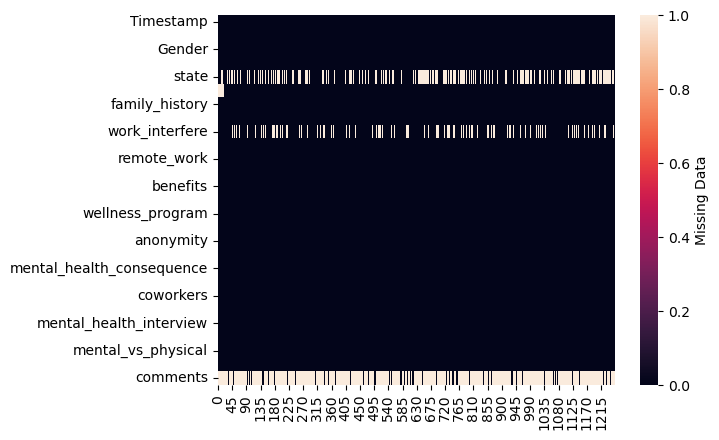

In [4]:
sns.heatmap(df_raw.isna().transpose(),
           cbar_kws = {'label': 'Missing Data'});

In [5]:
df_raw.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

Die Daten sind größten teils befreit von fehlenden Werten. 
Die Spalten mit den fehlenden Werten sind 
- state
- self_employed
- work_interfere
- comments

## 1.2 Betrachtung der Spalten mit NaN

### 1.2.1 State

Im Kopf der Datentabelle ist ersichtlich das die Personen aus der USA kommen auch den Staat zugewiesen bekommen. 
Personen aus UK oder Kanada weisen fehlende Werte auf. 

These 1: Nur Personen aus anderen Ländern, weisen fehlende Werte bei der Spalte Staat auf. 

In [6]:
df_raw.Country.value_counts().head(10)

Country
United States     751
United Kingdom    185
Canada             72
Germany            45
Ireland            27
Netherlands        27
Australia          21
France             13
India              10
New Zealand         8
Name: count, dtype: int64

In [7]:
df_raw.loc[(df_raw["Country"] == "United States") & (df_raw["state"].isna())].shape[0]

11

Die These 1 wird verworfen, da es 11 Reihen mit State = NaN für die USA Daten gibt.

State: 
- 40.9% NaN
- keine Bedeutung für spätere Analyse 

&rarr; Entfernung der Spalte bei Data Cleaning



### 1.2.2 self_employed

Aufgrund der geringen Anzahl an fehlenden Werten, besteht die Möglichkeit das NaN aus anderen Spalten abgeleitet werden kann. 

These 2: Die Entscheiddung über self_employed kann über die Spalten no_employees, leave, coworkers. 

Idee: 

- no_employees = Wenn ich selbstständig bin, habe ich vermutlich nicht viele Mitarbeiter
- leave = Wenn ich krank bin, habe ich keine Probleme Urlaub zu bekommen
- coworkers, supervisors = In der hinsicht interessant, weil die Person möglicherweise der Chef ist

In [8]:
df_raw.self_employed.value_counts()

self_employed
No     1095
Yes     146
Name: count, dtype: int64

In [9]:
df_raw.loc[df_raw["self_employed"].isna()]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [10]:
df_raw.loc[(df_raw["self_employed"].isna()) & df_raw["comments"].notna()]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
13,2014-08-27 11:33:26,36,Male,United States,CT,NaN,Yes,No,Never,500-1000,...,Don't know,No,No,Yes,Yes,No,No,Don't know,No,I'm not on my company's health insurance which...
15,2014-08-27 11:34:00,29,female,United States,IL,NaN,Yes,Yes,Rarely,26-100,...,Somewhat easy,No,No,Yes,Some of them,Maybe,Maybe,Don't know,No,I have chronic low-level neurological issues t...
16,2014-08-27 11:34:20,23,Male,United Kingdom,NaN,NaN,No,Yes,Sometimes,26-100,...,Very easy,Maybe,No,Some of them,No,Maybe,Maybe,No,No,My company does provide healthcare but not to ...


In [11]:
df_raw.loc[13,"comments"]

"I'm not on my company's health insurance which could be part of the reason I answered Don't know to so many questions."

In [12]:
df_raw.loc[15,"comments"]

'I have chronic low-level neurological issues that have mental health side effects. One of my supervisors has also experienced similar neurological problems so I feel more comfortable being open about my issues than I would with someone without that experience. '

In [13]:
df_raw.loc[16,"comments"]

"My company does provide healthcare but not to me as I'm on a fixed-term contract. The mental healthcare I use is provided entirely outside of my work."

In [14]:
df_raw.iloc[13]

Timestamp                                                  2014-08-27 11:33:26
Age                                                                         36
Gender                                                                    Male
Country                                                          United States
state                                                                       CT
self_employed                                                              NaN
family_history                                                             Yes
treatment                                                                   No
work_interfere                                                           Never
no_employees                                                          500-1000
remote_work                                                                 No
tech_company                                                               Yes
benefits                                            

Somit wird deutlich, das die Personen 13,15,16 nicht selbstständig sind.

Das wird im Cleaning behoben.

### 1.2.3 Comments

In [15]:
df_comments = df_raw.loc[df_raw["comments"].notna()]

In [16]:
df_raw.loc[16, "comments"]

"My company does provide healthcare but not to me as I'm on a fixed-term contract. The mental healthcare I use is provided entirely outside of my work."

Was machen wir mit Comments??????

### 1.2.4 work interfere

In [17]:
df_raw.work_interfere.isna().sum()

264

In [18]:
df_raw.work_interfere.value_counts()

work_interfere
Sometimes    465
Never        213
Rarely       173
Often        144
Name: count, dtype: int64

These: Die Variable treatment ((((interkorreliert)))) mit work interfere. Aus treatment kann man die Bedeutung von NaN bei work interfere hergeleitet werden. 

Grund: 

- Treatment = Haben Sie sich wegen einer psychischen Erkrankung in Behandlung begeben?
- work interfere = **Wenn Sie an einer psychischen Erkrankung leiden**, haben Sie das Gefühl, dass diese Ihre Arbeit beeinträchtigt?

Vorgehen: 

- Datensatz erstellen mit Bedingungen treatment = No & work interfere = NaN
- These überprüfen
- Bei Bestätigung &rarr; Erschaffung neuer Variable mental health condition   

In [19]:
df_raw.treatment.value_counts()

treatment
Yes    637
No     622
Name: count, dtype: int64

In [20]:
df_124 = df_raw.copy()
df_124 = df_124.loc[(df_raw["treatment"]=="No") & (df_raw["work_interfere"].isna())]

In [21]:
print( f'{df_124.shape[0]} vs. {df_raw.work_interfere.isna().sum()}')

260 vs. 264


Die Anzahlen sind fast gleich.
Bedeutung nach These: 

**260** Personen haben keine Hilfe gesucht und können work_interfere nicht beantworten. <br>
Der Unterschied **4** haben sich Hilfe gesucht auf Grund mentaler Probleme, haben aber work_interfere nicht beantwortet. 


Der Unterschied der Anzahl um 4 verwirft die These nicht, da die Personen mentale Probleme aufweisen.

Die These wird angenommen und eine neue Variable wird erschafft.<br>

Vorteile:
- Bessere Darstellung
- Mehr Informationen
- Eignung als abhängige Variable


## 1.3 Duplikate

In [22]:
df_raw.duplicated().sum()

0

Keine Duplikate. Dementsprechend keine Berücksichtigung. 

## 1.4 Datentypen/Weitere Probleme

In [23]:
df_raw.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [24]:
df_raw.head(3)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN


Ableitung aus Übersicht:

- Timestamp: object &rarr; datetime umwandeln

Mögliche weiteren Aufgaben werden folgend durch eine Funktion ermittelt, welche angibt wie viele Ausprägungen es gibt. Insbesondere bei einer Auswahl aus vorgefertigten Antworten ist dies entscheidend.

In [25]:
def spalten_uebersicht(df): 
    for col in df.columns:
        count_unique = df[col].nunique(dropna = True) 
        has_na = df[col].isna().any() # Da NA auch eine Bedeutung haben siehe 1.2.4
        answers = df[col].unique()[:8]
        
        if has_na: 
            print(f"{col}: {count_unique} Antwortmöglichkeiten & NaN vorhanden\n Ausprägungen: {answers}\n")
        else: 
            print(f"{col}: {count_unique} Antwortmöglichkeiten\n Ausprägungen {answers}\n")



In [26]:
spalten_uebersicht(df_raw)

Timestamp: 1246 Antwortmöglichkeiten
 Ausprägungen ['2014-08-27 11:29:31' '2014-08-27 11:29:37' '2014-08-27 11:29:44'
 '2014-08-27 11:29:46' '2014-08-27 11:30:22' '2014-08-27 11:31:22'
 '2014-08-27 11:31:50' '2014-08-27 11:32:05']

Age: 53 Antwortmöglichkeiten
 Ausprägungen [37 44 32 31 33 35 39 42]

Gender: 49 Antwortmöglichkeiten
 Ausprägungen ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile']

Country: 48 Antwortmöglichkeiten
 Ausprägungen ['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland']

state: 45 Antwortmöglichkeiten & NaN vorhanden
 Ausprägungen: ['IL' 'IN' nan 'TX' 'TN' 'MI' 'OH' 'CA']

self_employed: 2 Antwortmöglichkeiten & NaN vorhanden
 Ausprägungen: [nan 'Yes' 'No']

family_history: 2 Antwortmöglichkeiten
 Ausprägungen ['No' 'Yes']

treatment: 2 Antwortmöglichkeiten
 Ausprägungen ['Yes' 'No']

work_interfere: 4 Antwortmöglichkeiten & NaN vorhanden
 Ausprägungen: ['Often' 'Rarely' 'Never' 'Sometimes' nan]

no_e

Erkenntnisse: 

- Gender überprüfen (49 Möglichkeiten)
- Alter auf Ausreißer überprüfen


### 1.4.1 Alter

In [27]:
df_raw.Age.describe()

count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64

Es ist ersichtlich, das es negative Werte gibt, welche entfernt werden müssen im Cleaning Prozess

### 1.4.1 Geschlecht

In [28]:
df_raw.Gender.value_counts()

Gender
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter               

Aufgrund der Vielzahl der Geschlechter, werden die Geschlechter unterteilt in Male, Female, Divers.

Zuweisung folgender Ausprägungen zu Male/Female: 

- Kleinschreibung
- m/f
- Make
- Male
- Man
- Woman
- Female
- femail
- Cis (...)
- Mail

Maybe ändern!

## 1.5. Zusammenfassung der Aufgaben des Cleanings

|Variable|Aufgabe|
|--------|-------|
|state|Entfernung Variable|
|self_employed|Berichtigung einzelner Werte|
|work_interfere| Umwandlung NaN |
|mental_health_condition| Erstellung Variable aus Zusammenhang treatment & work interfere|
|timestamp|Umwandlung in datetime|
|Age|Negative Werte entfernen|
|Gender|Unterteilung in Male, Female, Divers|


Alle Variablen die auf vorgegebenen Antworten beruhen (Datentyp = object), werden unterschiedlich in 2 Datensätzen nach dem Cleaning gespeichert. 

1. Datensatz: Beibehaltung der Werte aufgrund übersichtlicher explorative Darstellungen.
2. Datensatz: Umwandlung der Variablen in numerische Werte um eine explanatorische Analyse zu gewährleisten und um Zusammenhänge, Prädiktionen darstellen/berechnen. (Dieses Vorgehen unterliegt Annahmen ordinaler Skalen und Likert-Skalen,....)


# 2. Cleaning & Erstellen Datensätze für weitere Analyse

## 2.1 Copy des ursprünglichen Datensatz

In [29]:
df = df_raw.copy()

## 2.2 state

Aufgrund der Unvollständigkeit der Daten und fehlender Bedeutsamkeit für die Analyse wird die Variable entfernt.

In [30]:
df = df.drop(["state"], axis=1)

Verifizierung:

In [31]:
assert "state" not in df.columns, "Spalte wurde nicht entfernt!"

## 2.3 self_employed

Durch die vorherige Analyse konnte herausgefunden werden, das die Personen in der Zeile 13, 15, 16 nicht self_employed sind. Dies wird nachfolgend geändert. 

In [32]:
df["self_employed"].isna().sum().sum()

18

In [33]:
df.loc[13, "self_employed"] = "No"
df.loc[15, "self_employed"] = "No"
df.loc[16, "self_employed"] = "No"

In [34]:
df["self_employed"].isna().sum().sum()

15

## 2.4 work_interfere

In diesem Abschnitt werden die NaN-Werte umgewandelt in "Not applicable". Da die fehlende Werte für die weiteren Analysen beweisen [vgl. 1.2.4]

In [35]:
df["work_interfere"].isna().sum().sum()

264

In [36]:
df["work_interfere"].value_counts()

work_interfere
Sometimes    465
Never        213
Rarely       173
Often        144
Name: count, dtype: int64

In [37]:
df.loc[(df["treatment"]=="No") & (df["work_interfere"].isna()), "work_interfere"] = "Not applicable"

In [38]:
df["work_interfere"].value_counts()

work_interfere
Sometimes         465
Not applicable    260
Never             213
Rarely            173
Often             144
Name: count, dtype: int64

In [39]:
df.work_interfere.isna().sum().sum()

4

Wir verbleiben mit den 4 fehlenden Werten. Diese werden für die weitere Analyse beibehalten um die Ergebnisse der Analyse nicht zu verzerren. Diese Personen, haben sich Hilfe gesucht, wollen allerdings keine Aussage hinsichtlich der "Beeinträchtigung der Arbeit durch mentale Proble" (work_interfere) treffen.

## 2.5 mental_health_condition

Um das Vorgehen zur Schaffung der neuen Variable wird nachfolgend die Gedanken und Prozesse dargestellt.

work_intefere: If you have a mental health condition, do you feel that it interferes with your work?

- Bei Nichtbeantwortung bestehen 2 Möglichkeiten. Entweder sie haben keine mentalen Problemen oder sie wollten es nicht beantworten (Die Personen, wissen es nicht oder es ist ihnen zu privat,...)

treatment: Have you sought treatment for a mental health condition?

- Bei der Variable gibt es nur 2 Antwortmöglichkeiten (yes/no)
- Allerdings sind bei der Antwort **no** auch die Personen mit einbegriffen, welche sich trotz mentaler Probleme, keine Hilfe professionelle Hilfe gesucht/erhalten haben.

Im Zusammenhang bedeutet das: 

- Durch den vorherigen Prozess [vgl. 2.4] wurde dargestellt, welche Personen keine mentalen Probleme haben. 
- Somit erstellen wir eine neue Variable (**mental_health_condition**), welche das Vorliegen mentaler Probleme beschreibt. 

In [40]:
df["mental_health_condition"] = "Yes"
df.loc[df["work_interfere"]=="Not applicable", "mental_health_condition"] = "No"

In [41]:
df["mental_health_condition"].value_counts()

mental_health_condition
Yes    999
No     260
Name: count, dtype: int64

## 2.6 timestamp

In [42]:
df["Timestamp"] = pd.to_datetime(arg= df["Timestamp"], errors= "coerce")

In [43]:
df["Timestamp"].dtype

dtype('<M8[ns]')

## 2.7 Age

Bei der Variable Alter haben sind negative Werte vorhanden die keinen Mehrwert haben. Zudem sind sie immens groß. <br> Dies wird folgend dargestellt. 

In [44]:
df["Age"].min()

-1726

Somit werden alle Werte kleiner 0 entfernt.

In [45]:
df = df[df["Age"]> 0]

In [46]:
df["Age"].describe()

count    1.256000e+03
mean     7.961787e+07
std      2.821663e+09
min      5.000000e+00
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64

Sichtbar am Minimum und Maximum ist das es immer noch Ausreißer ohne Mehrwert gibt. <br>
Somit werden die Grenzen auf 16-100 gesetzt um diese zu entfernen

In [47]:
df = df[(df["Age"]>=16) & (df["Age"]< 100)]
df["Age"].describe()

count    1251.000000
mean       32.076739
std         7.288272
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64

### 2.7.1 Verteilung Alter

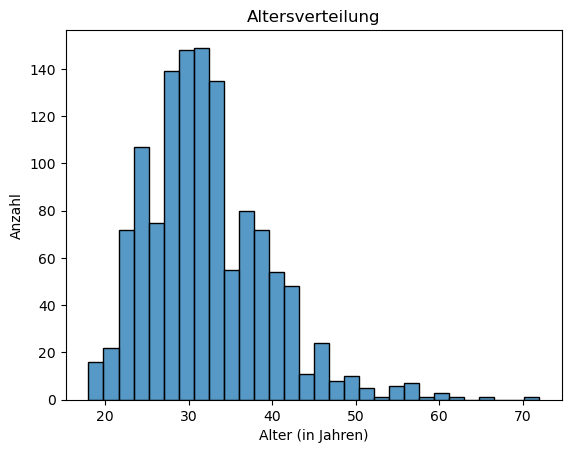

In [48]:
sns.histplot(data=df, x="Age", color="tab:blue", bins=30)
plt.xlabel("Alter (in Jahren)")
plt.ylabel("Anzahl")
plt.title("Altersverteilung")
plt.show();

## 2.8 Gender

Für analytische Zwecke wurden die ursprünglichen Angaben zu den Geschlechtern in die drei Kategorien überführt. 

- male 
- female 
- diverse 

 Dabei wurden die Antworten trans, non-binary und jegliche Geschlechteridentifikationen in **diverse** zusammengefasst zu analytischen Zwecken. 
 Rechtschreibfehler wurden nach eigenem Ermäßen den Geschlechtern female/male zugewiesen. Der Prozess wird beispielsweise dargestellt
 
 Bsp.:

 - make, msle &rarr; male
 - femake, femail &rarr; female

Zur Vereinfachung der Arbeit werden zuerst alle Zeichen in Kleinschreibung umgewandelt.

In [49]:
df["Gender"] = df["Gender"].str.strip().str.lower()

In [50]:
df["Gender"].value_counts()

Gender
male                                              819
female                                            185
m                                                 150
f                                                  53
make                                                4
woman                                               4
cis male                                            3
man                                                 2
female (trans)                                      2
msle                                                1
guy (-ish) ^_^                                      1
male leaning androgynous                            1
trans woman                                         1
queer                                               1
neuter                                              1
agender                                             1
female (cis)                                        1
mail                                                1
malr                 

In [51]:
def gender_categorize(gender):
    male_array = {"male", "m", "make","cis male","man","maile","mal","male (cis)", "msle","mail","malr","cis man"}
    female_array = {"female","f", "woman","femake","cis female","cis-female/femme","femail","female (cis)"}
    if gender in male_array:
        return "male"
    elif gender in female_array:
        return "female"
    else: 
        return "diverse"

In [52]:
df["Gender"] = df["Gender"].apply(gender_categorize)

In [53]:
df["Gender"].unique()

array(['female', 'male', 'diverse'], dtype=object)

### 2.8.1 Geschlechtsverteilung

In [54]:
gender_count = df["Gender"].value_counts().reset_index()
gender_count.columns = ["Gender", "Count"]

px.pie(gender_count, values="Count", names="Gender", 
       title="Geschlechterverteilung", 
       hover_data=["Count"], 
       labels={"Count": "Anzahl"}).update_traces(textinfo="percent+label")


# 3. Erstellen der Datensätze

Nachfolgend werden die Datensätze für die jeweiligen Analysen erstellt. 

- Datensatz für die deskriptive Analyse
- Datensatz für die explorative Analyse 

In [55]:
df_cl = df.copy()

Für die explorative Analyse werden bestimmte Werte in Boolsche Wertepaare (0,1) oder in Form von anderen Zahlenreihen umgewandelt. Hierbei basiert es auf die Annahmen der Likert Skala (Überarbeiten/Nachlesen!!!! KOmm du hund"!!!!!)


In [56]:
spalten_uebersicht(df_cl)

Timestamp: 1239 Antwortmöglichkeiten
 Ausprägungen <DatetimeArray>
['2014-08-27 11:29:31', '2014-08-27 11:29:37', '2014-08-27 11:29:44',
 '2014-08-27 11:29:46', '2014-08-27 11:30:22', '2014-08-27 11:31:22',
 '2014-08-27 11:31:50', '2014-08-27 11:32:05']
Length: 8, dtype: datetime64[ns]

Age: 45 Antwortmöglichkeiten
 Ausprägungen [37 44 32 31 33 35 39 42]

Gender: 3 Antwortmöglichkeiten
 Ausprägungen ['female' 'male' 'diverse']

Country: 46 Antwortmöglichkeiten
 Ausprägungen ['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland']

self_employed: 2 Antwortmöglichkeiten & NaN vorhanden
 Ausprägungen: [nan 'No' 'Yes']

family_history: 2 Antwortmöglichkeiten
 Ausprägungen ['No' 'Yes']

treatment: 2 Antwortmöglichkeiten
 Ausprägungen ['Yes' 'No']

work_interfere: 5 Antwortmöglichkeiten & NaN vorhanden
 Ausprägungen: ['Often' 'Rarely' 'Never' 'Sometimes' 'Not applicable' nan]

no_employees: 6 Antwortmöglichkeiten
 Ausprägungen ['6-25' 'More than

In [57]:
df_reg = df_cl.copy()
df_reg_1 = df_cl.copy()

reg_map = {
    "Yes": 2,
    "No": 0,
    "Some of them": 1 
}

reg_map_1 = {
    "Yes": 2,
    "No": 1, 
    "Some of them": 0
}

df_reg["supervisor"] = df_reg["supervisor"].map(reg_map)
df_reg["coworkers"] = df_reg["coworkers"].map(reg_map)

df_reg_1["supervisor"] = df_reg_1["supervisor"].map(reg_map_1)
df_reg_1["coworkers"] = df_reg_1["coworkers"].map(reg_map_1)

Verify changes:

In [58]:
df_reg["supervisor"].unique()

array([2, 0, 1], dtype=int64)

In [59]:
df_reg["coworkers"].unique()

array([1, 0, 2], dtype=int64)

# 4 Deskriptive Analyse

## 4.1 Verteilungen der einzelnenen Variablen und Ableitung von Hypothesen

### 4.1.2 Alter

In [60]:
fig = px.histogram(df_cl, x = "Age", nbins=30, title="Allgemeine Verteilung des Alters")

fig.show()

Es ist eine linkssteile,rechtsschiefe und bimodale Verteilung. Der Großteil aller Umfrageteilnehmer sind 25-35 Jahre alt.

Alter

- Mann vs Frau vs divers (boxplot)
- country durchschnittsalter
- supervisor & coworkers
- mental health condition


#### 4.1.2.1 Verteilung des Alters hinsichtlich Geschlecht

In [61]:
fig = px.box(df_cl, y = "Age", facet_col= "Gender", color="Gender", boxmode= "overlay", points= "all", title="Verteilung des Alters nach Geschlecht")

fig.show()

Das Durchschnittsalter zwischen Mann und Frau unterscheidet sich allgemein nicht erheblich. Das Geschlecht Divers beweist geringere Werte.

#### 4.1.2.2 Verteilung Alter nach Ländern

In [62]:
df_cl["Country"].value_counts().head(10)

Country
United States     746
United Kingdom    184
Canada             72
Germany            45
Netherlands        27
Ireland            27
Australia          21
France             13
India              10
New Zealand         8
Name: count, dtype: int64


Die Anzahl an Beobachtungen konzentrieren sich auf den oben dargestellten Bereich. Die weitere Analyse legt einen Threshold von >=10 fest. Da es bei Ländern mit wenigen Beobachtungen zu Verzerrungen kommt.

In [63]:
country_over_10 = df_cl["Country"].value_counts().loc[lambda x: x >=10].index

In [64]:
age_country = df_cl[df_cl["Country"].isin(country_over_10)]

In [65]:

fig = px.box(age_country, y = "Age", facet_col= "Country", color= "Country", boxmode = "overlay", points=None, title = "Verteilung des Alters nach Ländern")

fig.for_each_annotation(lambda a: a.update(font_size= 8))
fig.show()

Das Durschschnittsalter der Personen hinsichtlich der unterschiedlichen Arbeitsorte unterscheidet sich nicht grundlegend. Die USA hat erhöhte Varianz, sowie auch die UK. Die Stichprobe für die beiden Länder ist allerdings auch entscheidend höher.

#### 4.1.2.3 Supervisor vs. Co-Worker

In [66]:
fig = make_subplots(rows=1,cols=2)

fig.add_trace(
    go.Bar(x=df_cl["coworkers"].value_counts().index, 
           y=df_cl["coworkers"].value_counts().values,
           name="Kollegen"),
    row=1, col=1
)
fig.add_trace(
    go.Bar(x = df_cl["supervisor"].value_counts().index,
           y= df_cl["supervisor"].value_counts().values, 
           name="Vorgesetzte"),
    row=1, col=2
)

fig.update_layout(height=600, width=800, title_text= "Kommunikation zu Kollegen und Vorgesetzten")
fig.show()


Ersichtlich ist der Unterschied zwischen Kollegen und Vorgesetzten. 
- Bei den Kollegen erscheint für viele Personen die Antwortmöglichkeit: Ich kann mit einigen über psychische Probleme reden am nah liegendsten. Es liegt wahrscheinlich in der Natur des Menschens
- Bei den Vorgesetzten ist die Varianz zwischen den Kommunikationsmöglichkeiten höher


Ziel der fortlaufenden Analyse ist ob mit dem Alter das Kommunikationsverhalten zunimmt. Die Personen eher mit den Angehörigen der Unternehmen reden würden. 

**These: Mit dem Alter steigt die Bereitschaft mentale Probleme mit zu teilen.**


#### 4.1.2.4 Mental Health Condition vs. Alter

In [67]:
mental_age = (df_cl.groupby(["Age", "mental_health_condition"]).size().reset_index(name = "count"))

In [68]:
fig = px.bar(mental_age, x = "Age",y = "count",color = "mental_health_condition", title="Vertreilung des Alters hinsichtlich psychische Probleme", barmode= "stack")

fig.show()

Die Übersicht ist verzerrt durch die Altersverteilung. Eine weiter Analyse erfolgt in der explorativen Analyse.

**These: Mit zunehmenden Alter steigt die Wahrscheinlichkeit mentale Probleme zu haben.**

### 4.1.3 Geschlecht

#### 4.1.3.2 Geschlecht und Kommunikation über Probleme

In [68]:
gender_supervisor = (df_cl.groupby(["Gender", "supervisor"]).size().reset_index(name= "count"))
gender_coworkers = (df_cl.groupby(["Gender", "coworkers"]).size().reset_index(name= "count"))

gender_list = ["male", "female", "diverse"]


In [69]:
fig = make_subplots(rows=2, cols=3,
                    specs=[[{'type':'domain'}]*3, [{'type':'domain'}]*3],
                    subplot_titles=[
                        f"Supervisor - {gender}" for gender in gender_list
                    ] + [
                        f"Coworkers - {gender}" for gender in gender_list
                    ])

for i, gender in enumerate(gender_list):
    data = gender_supervisor[gender_supervisor["Gender"] == gender]
    fig.add_trace(
        go.Pie(labels= data["supervisor"], values=data["count"], name = f"{gender} Supervisor"),
        row = 1, col= i+1
    )

for i, gender in enumerate(gender_list):
    data = gender_coworkers[gender_coworkers["Gender"]==gender]
    fig.add_trace(
        go.Pie(labels= data["coworkers"], values=data["count"], name = f"{gender} Coworkers"),
        row=2, col=i+1
    )

fig.update_layout(
    title_text = "Kommunikationsverhalten zu Vorgesetzten und Kollegen nach Geschlecht",
    height = 700
)


fig.show()




Hinsichtlich der Kollegen hat sich der Trend bestätigt. Unabhängig vom Geschlecht würden die Personen einigen der Kollegen über psychische Probleme erzählen. 
Interessant ist jedoch, das Männer offen gegenüber ihren vorgesetzten sein würden im Gegensatz zu den anderen Geschlechtern.

Somit ergibt sich die These: **Männer sind ihrem Vorgesetzten offener hinsichtlich ihren psychischen Zustandes.**

#### 4.1.3.2 Geschlecht vs Mental Health Condition

In [70]:
gender_mhc = (df_cl.groupby(["Gender", "mental_health_condition"]).size().reset_index(name = "count"))

In [ ]:
fig = px.pie(gender_mhc, values= "count", facet_col="Gender", color= "mental_health_condition")

fig.update_layout(
    title ={
        "text": "Psychische Erkrankungen der Geschlechter <span style=\"color:red\">(Rot = Erkrankung)</span>"
    }
)

fig.show()

Der Anteil der psychischen Krankheiten von Frauen und Diversen sind höher.

**These: Die Wahrscheinlichkeit einer psychischen Erkrankungen ist bei Frauen und Diversen höher.**

### 4.1.4 Mental Health Condition

### 4.1.4.1 Mental Health Condition und Family History

In [72]:
df_cl.family_history.value_counts()

family_history
No     762
Yes    489
Name: count, dtype: int64

In [73]:
mental_family = df_cl.groupby(["mental_health_condition", "family_history"]).size().reset_index(name= "count")

fig = px.pie(mental_family, values= "count", facet_col= "mental_health_condition", color= "family_history")

fig.update_layout(
    title ={
        "text": "Familiengeschichte nach Psychischer Erkrankung <span style=\"color:red\">(Rot = Psychische Erkrankung in der Familie)</span>"
    }
)

fig.show()


Die Darstellung beweist:

- Bei Personen die sich als mental gesund bezeichnen, haben 83,7% keine Erkrankung in der Familie gehabt.
- Bei mental erkrankten Personen liegt die Wahrscheinlichkeit ca. bei 50:50

Somit ergibt sich die These:

**Das Fehlen familiärer Vorerkrankungen ist ein guter Prädiktor für die allgemeine Gesundheit – jedoch nicht für das Auftreten psychischer Erkrankungen.**

#### 4.1.4.2 Remote Work 

In [74]:
mental_remote = df_cl.groupby(["mental_health_condition", "remote_work"]).size().reset_index(name= "count")

fig = px.pie(mental_remote, values= "count", facet_col= "mental_health_condition", color= "remote_work")

fig.update_layout(
    title ={
        "text": "Remote-Work nach Psychischer Erkrankung <span style=\"color:red\">(Rot = Remote Work (Ja))</span>"
    }
)

fig.show()

Beide Verteilungen sehen ausgeglichen aus. Da keine Zeitreihenbetrachtung möglich ist, können keine These abgeleitet werden. Die langfristigen Effekte von Remote-Work können dementsprechend nicht untersucht werden.

### 4.1.5 Communication

#### 4.1.5.1 Number of Employees

Die Anzahl von Personen in dem Unternehmen können ein ausschlaggebender Punkt für die Kommunikation von Problemen sein. 

Somit besteht die Möglichkeit, das bei einem großen Unternehmen, die Antwort-Tendenz hinsichtlich der Kommunikation eher bei "Some of them liegt".
Und bei kleineren Unternehmen, wo eine höhere Kommunikation und ein besserer Zusammenhalt entscheidend ist, auf die extremen Möglichkeiten "Ja" oder "Nein" fällt

In [75]:
df["no_employees"].unique()

array(['6-25', 'More than 1000', '26-100', '100-500', '1-5', '500-1000'],
      dtype=object)

Ordnen der Werte zur besseren Darstellung

In [76]:
number_order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
df_cl["no_employees"] = pd.Categorical(df_cl["no_employees"], categories= number_order, ordered= True )

In [77]:
fig = px.histogram(
    df_cl,
    x="no_employees",
    color="coworkers", 
    barmode="relative",  
    histfunc="count",
    title="Kommunikation mit Kolleg:innen nach Unternehmensgröße",
    category_orders={"no_employees": number_order}
)

fig.show()

In [78]:
fig = px.histogram(
    df_cl,
    x="no_employees",
    color="supervisor", 
    barmode="relative",  
    histfunc="count",
    title="Kommunikation mit Vorgesetzten nach Unternehmensgröße",
    category_orders={"no_employees": number_order}
)
fig.show()

Augenscheinlich sind die oben genannten Ideen nicht nachvollziehbar. Die Größe hat keinen Einfluss. 

Da die These nicht verworfen werden sollte, ohne Weiteres, wird folgend die Unternehmensgröße in Big [>=100] und Small [<=100] unterschieden und die relativen Häufigkeiten dargestellt.


In [79]:
size_map = {"1-5": "Small",
            "6-25": "Small",
            "26-100": "Small",
            "100-500": "Big",
            "500-1000": "Big",
            "More than 1000": "Big"}
df_cl["U_Size"] = df_cl["no_employees"].map(size_map)

In [ ]:
fig = px.histogram(
    df_cl,
    x="U_Size",
    color="coworkers",
    barnorm="percent", 
    barmode="stack",
    title="Anteil der Kommunikation mit Kolleg:innen nach Unternehmensgröße"
)
fig.show()

In [81]:
fig = px.histogram(
    df_cl,
    x="U_Size",
    color="supervisor",
    barnorm="percent", 
    barmode="stack",
    title="Anteil der Kommunikation mit Vorgesetzten nach Unternehmensgröße"
)
fig.show()

Auch hier lassen sich keine Unterschiede erkennen, dementsprechend wird die These verworfen.

Allerdings wird dieser mögliche Zusammenhang in der explorativen Datenanalyse noch betrachtet.

#### 4.1.5.2 Remote Work

Füge mal noch ein Psychologische Konzepte, wieso Kommunikation beeinflusst wird von RemoteWork.

In [82]:
fig = px.histogram(
    df_cl,
    x="remote_work",
    color="coworkers",  # alternativ: supervisor
    barmode="stack",
    barnorm="percent",  # ← Anteil wichtig!
    title="Kommunikation mit Kolleg:innen nach Remote-Arbeit"
)
fig.show()

In [83]:
fig = px.histogram(
    df_cl,
    x="remote_work",
    color="supervisor",
    barmode="stack",
    barnorm="percent",
    title="Kommunikation mit Vorgesetzten nach Remote-Arbeit"
)
fig.show()

Auch hier lassen sich keine Unterschiede hinsichtlich der Kommunikation ableiten.

**Thesen der explorativen Analyse:**

1. Mit dem Alter steigt die Bereitschaft mentale Probleme mit zu teilen.
2. Mit zunehmenden Alter steigt die Wahrscheinlichkeit mentale Probleme zu haben.
3. Männer sind ihrem Vorgesetzten offener hinsichtlich ihren psychischen Zustandes.
4. Die Wahrscheinlichkeit einer psychischen Erkrankungen ist bei Frauen und Diversen höher.
5. Das Fehlen familiärer Vorerkrankungen ist ein guter Prädiktor für die allgemeine Gesundheit – jedoch nicht für das Auftreten psychischer Erkrankungen.

**Mögliche Korrelationen**

6. Kommunikation - Unternehmensgröße

# 5 Explorative Analyse

## 5.1 Mit dem Alter steigt die Bereitschaft mentale Probleme mit zu teilen.

In [84]:
df_cl["age_group"] = pd.cut(df_cl["Age"], bins = [0,25,40,55,100], labels = ["<25","25-40","40-55",">55"])

In [85]:
fig = px.histogram(df_cl, x="Age",facet_col="coworkers",barmode="group", nbins=30, title= "Kommunikationsverhalten mit Kollegen in Abhängigkeit vom Alter")

fig.update_layout(xaxis_title = "Alter", yaxis_title = "Anzahl")
fig.show()

Die Verteilungen, wie auch die vorherige Analyse (4.1.2.3), erlauben keine Aussage über die These.

Dementsprechend wird es folgend in einer Regressionsanalyse untersucht. 

In [105]:
X = sm.add_constant(df_reg['Age'])
y = df_reg["coworkers"]

model = sm.MNLogit(y,X).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.930603
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:              coworkers   No. Observations:                 1251
Model:                        MNLogit   Df Residuals:                     1247
Method:                           MLE   Df Model:                            2
Date:                Tue, 24 Jun 2025   Pseudo R-squ.:               0.0001245
Time:                        14:10:39   Log-Likelihood:                -1164.2
converged:                       True   LL-Null:                       -1164.3
Covariance Type:            nonrobust   LLR p-value:                    0.8651
coworkers=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.2616      0.323      3.901      0.000       0.628       1.895
Age            -0.0052    

In [107]:
X = sm.add_constant(df_reg['Age'])
y = df_reg["supervisor"]

model = sm.MNLogit(y,X).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 1.084973
         Iterations 4
                          MNLogit Regression Results                          
Dep. Variable:             supervisor   No. Observations:                 1251
Model:                        MNLogit   Df Residuals:                     1247
Method:                           MLE   Df Model:                            2
Date:                Tue, 24 Jun 2025   Pseudo R-squ.:               0.0001577
Time:                        14:11:59   Log-Likelihood:                -1357.3
converged:                       True   LL-Null:                       -1357.5
Covariance Type:            nonrobust   LLR p-value:                    0.8072
supervisor=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0046      0.334      0.014      0.989      -0.650       0.659
Age             -0.0036

Überprüfung aller kombination (auch some/y)

In [ ]:
X = sm.add_constant(df_reg_1['Age'])
y = df_reg_1["coworkers"]

model = sm.MNLogit(y,X).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.930603
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:              coworkers   No. Observations:                 1251
Model:                        MNLogit   Df Residuals:                     1247
Method:                           MLE   Df Model:                            2
Date:                Tue, 24 Jun 2025   Pseudo R-squ.:               0.0001245
Time:                        16:18:17   Log-Likelihood:                -1164.2
converged:                       True   LL-Null:                       -1164.3
Covariance Type:            nonrobust   LLR p-value:                    0.8651
coworkers=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.2616      0.323     -3.901      0.000      -1.895      -0.628
Age             0.0052    

In [122]:
X = sm.add_constant(df_reg_1['Age'])
y = df_reg_1["supervisor"]

model = sm.MNLogit(y,X).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 1.084973
         Iterations 4
                          MNLogit Regression Results                          
Dep. Variable:             supervisor   No. Observations:                 1251
Model:                        MNLogit   Df Residuals:                     1247
Method:                           MLE   Df Model:                            2
Date:                Tue, 24 Jun 2025   Pseudo R-squ.:               0.0001577
Time:                        16:17:16   Log-Likelihood:                -1357.3
converged:                       True   LL-Null:                       -1357.5
Covariance Type:            nonrobust   LLR p-value:                    0.8072
supervisor=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0046      0.334     -0.014      0.989      -0.659       0.650
Age              0.0036

Die These wird verworfen.

## 5.2 Mit zunehmenden Alter steigt die Wahrscheinlichkeit mentale Probleme zu haben.

In [97]:
df_reg['mental_bin'] = df_reg['mental_health_condition'].map({'Yes': 1, 'No': 0})

In [99]:
X = sm.add_constant(df_reg['Age'])
y = df_reg['mental_bin']

model = sm.Logit(y, X).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.506697
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             mental_bin   No. Observations:                 1251
Model:                          Logit   Df Residuals:                     1249
Method:                           MLE   Df Model:                            1
Date:                Tue, 24 Jun 2025   Pseudo R-squ.:                0.004379
Time:                        13:44:53   Log-Likelihood:                -633.88
converged:                       True   LL-Null:                       -636.67
Covariance Type:            nonrobust   LLR p-value:                   0.01821
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6020      0.326      1.845      0.065      -0.038       1.242
Age            0.0235      0.

Geringe Effektstärke aber signifikantes Ergebnis.

## 5.3 Männer sind ihrem Vorgesetzten offener hinsichtlich ihren psychischen Zustandes.

In [124]:
gender_communication = df_reg.copy()
gender_communication["Gender"] = gender_communication["Gender"].map({"female": 0,
                                                                    "diverse":0,
                                                                    "male":1})
gender_communication_1 = df_reg_1.copy()
gender_communication_1["Gender"] = gender_communication_1["Gender"].map({"female": 0,
                                                                    "diverse":0,
                                                                    "male":1})

In [113]:
gender_communication.Gender.unique()

array([0, 1], dtype=int64)

In [114]:
X = sm.add_constant(gender_communication["Gender"])
y = gender_communication["supervisor"]

model = sm.MNLogit(y,X).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 1.077945
         Iterations 4
                          MNLogit Regression Results                          
Dep. Variable:             supervisor   No. Observations:                 1251
Model:                        MNLogit   Df Residuals:                     1247
Method:                           MLE   Df Model:                            2
Date:                Tue, 24 Jun 2025   Pseudo R-squ.:                0.006634
Time:                        14:19:19   Log-Likelihood:                -1348.5
converged:                       True   LL-Null:                       -1357.5
Covariance Type:            nonrobust   LLR p-value:                 0.0001227
supervisor=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0215      0.147      0.147      0.883      -0.266       0.309
Gender          -0.1773

In [115]:
X = sm.add_constant(gender_communication["Gender"])
y = gender_communication["coworkers"]

model = sm.MNLogit(y,X).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.929163
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:              coworkers   No. Observations:                 1251
Model:                        MNLogit   Df Residuals:                     1247
Method:                           MLE   Df Model:                            2
Date:                Tue, 24 Jun 2025   Pseudo R-squ.:                0.001672
Time:                        14:20:10   Log-Likelihood:                -1162.4
converged:                       True   LL-Null:                       -1164.3
Covariance Type:            nonrobust   LLR p-value:                    0.1428
coworkers=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.9628      0.148      6.501      0.000       0.673       1.253
Gender          0.1711    

Auch wieder andere Kombination (ENTSCHEIDEND???????????)

In [125]:
X = sm.add_constant(gender_communication_1["Gender"])
y = gender_communication_1["supervisor"]

model = sm.MNLogit(y,X).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 1.077945
         Iterations 4
                          MNLogit Regression Results                          
Dep. Variable:             supervisor   No. Observations:                 1251
Model:                        MNLogit   Df Residuals:                     1247
Method:                           MLE   Df Model:                            2
Date:                Tue, 24 Jun 2025   Pseudo R-squ.:                0.006634
Time:                        16:23:09   Log-Likelihood:                -1348.5
converged:                       True   LL-Null:                       -1357.5
Covariance Type:            nonrobust   LLR p-value:                 0.0001227
supervisor=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0215      0.147     -0.147      0.883      -0.309       0.266
Gender           0.1773

In [126]:
X = sm.add_constant(gender_communication_1["Gender"])
y = gender_communication_1["coworkers"]

model = sm.MNLogit(y,X).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.929163
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:              coworkers   No. Observations:                 1251
Model:                        MNLogit   Df Residuals:                     1247
Method:                           MLE   Df Model:                            2
Date:                Tue, 24 Jun 2025   Pseudo R-squ.:                0.001672
Time:                        16:23:43   Log-Likelihood:                -1162.4
converged:                       True   LL-Null:                       -1164.3
Covariance Type:            nonrobust   LLR p-value:                    0.1428
coworkers=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.9628      0.148     -6.501      0.000      -1.253      -0.673
Gender         -0.1711    

## 5.4 Die Wahrscheinlichkeit einer psychischen Erkrankungen ist bei Frauen und Diversen höher.

In [128]:
gender_communication["mental_health_condition"] = gender_communication["mental_health_condition"].map({"Yes": 1, 
                                                                                                       "No": 0})

In [129]:
X = sm.add_constant(gender_communication["Gender"])
y = gender_communication["mental_health_condition"]

model = sm.Logit(y,X).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.504456
         Iterations 6
                              Logit Regression Results                             
Dep. Variable:     mental_health_condition   No. Observations:                 1251
Model:                               Logit   Df Residuals:                     1249
Method:                                MLE   Df Model:                            1
Date:                     Tue, 24 Jun 2025   Pseudo R-squ.:                0.008781
Time:                             16:30:07   Log-Likelihood:                -631.07
converged:                            True   LL-Null:                       -636.67
Covariance Type:                 nonrobust   LLR p-value:                 0.0008261
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8546      0.179     10.347      0.000       1.503  

Hoch signifikanter negativer Effekt. These bestätigt.

## 5.5 Das Fehlen familiärer Vorerkrankungen ist ein guter Prädiktor für die allgemeine Gesundheit – jedoch nicht für das Auftreten psychischer Erkrankungen.

In [133]:
family_health = gender_communication.copy()
family_health["family_history"] = family_health["family_history"].map({"Yes": 1,
                                                                      "No": 0})

In [134]:
X = sm.add_constant(family_health["family_history"])
y = family_health["mental_health_condition"]

model = sm.Logit(y,X).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.477650
         Iterations 6
                              Logit Regression Results                             
Dep. Variable:     mental_health_condition   No. Observations:                 1251
Model:                               Logit   Df Residuals:                     1249
Method:                                MLE   Df Model:                            1
Date:                     Tue, 24 Jun 2025   Pseudo R-squ.:                 0.06145
Time:                             16:36:36   Log-Likelihood:                -597.54
converged:                            True   LL-Null:                       -636.67
Covariance Type:                 nonrobust   LLR p-value:                 9.078e-19
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.9273      0.080     11.537      0.000  

Der Effekt ist höchst signifikant.

## 5.6 Kommunikation - Unternehmensgröße

In [135]:
df_reg["no_employees"].value_counts()

no_employees
6-25              289
26-100            288
More than 1000    281
100-500           175
1-5               158
500-1000           60
Name: count, dtype: int64

In [148]:
size_map = {
    "1-5": 1,
    "6-25": 2,
    "26-100": 3,
    "100-500": 4,
    "500-1000": 5,
    "More than 1000": 6
}

df_reg["no_employees"] = df_reg["no_employees"].map(size_map)


In [152]:
df_reg_1["no_employees"] = df_reg_1["no_employees"].map(size_map)


In [149]:
df_reg["no_employees"].unique()

[2, 6, 3, 4, 1, 5]
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]

In [ ]:
X = sm.add_constant(df_reg["no_employees"])
y = df_reg["coworkers"]

model = sm.MNLogit(y,X).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.921968
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:              coworkers   No. Observations:                 1251
Model:                        MNLogit   Df Residuals:                     1247
Method:                           MLE   Df Model:                            2
Date:                Tue, 24 Jun 2025   Pseudo R-squ.:                0.009403
Time:                        17:06:03   Log-Likelihood:                -1153.4
converged:                       True   LL-Null:                       -1164.3
Covariance Type:            nonrobust   LLR p-value:                 1.760e-05
 coworkers=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.4837      0.170      8.750      0.000       1.151       1.816
no_employees    -0.1083

In [151]:
X = sm.add_constant(df_reg["no_employees"])
y = df_reg["supervisor"]

model = sm.MNLogit(y,X).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 1.079778
         Iterations 4
                          MNLogit Regression Results                          
Dep. Variable:             supervisor   No. Observations:                 1251
Model:                        MNLogit   Df Residuals:                     1247
Method:                           MLE   Df Model:                            2
Date:                Tue, 24 Jun 2025   Pseudo R-squ.:                0.004945
Time:                        17:06:16   Log-Likelihood:                -1350.8
converged:                       True   LL-Null:                       -1357.5
Covariance Type:            nonrobust   LLR p-value:                  0.001215
supervisor=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0306      0.170     -0.180      0.857      -0.363       0.302
no_employees    -0.0226

In [154]:
X = sm.add_constant(df_reg_1["no_employees"])
y = df_reg_1["coworkers"]

model = sm.MNLogit(y,X).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.921968
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:              coworkers   No. Observations:                 1251
Model:                        MNLogit   Df Residuals:                     1247
Method:                           MLE   Df Model:                            2
Date:                Tue, 24 Jun 2025   Pseudo R-squ.:                0.009403
Time:                        17:08:38   Log-Likelihood:                -1153.4
converged:                       True   LL-Null:                       -1164.3
Covariance Type:            nonrobust   LLR p-value:                 1.760e-05
 coworkers=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.4837      0.170     -8.750      0.000      -1.816      -1.151
no_employees     0.1083

In [155]:
X = sm.add_constant(df_reg_1["no_employees"])
y = df_reg_1["supervisor"]

model = sm.MNLogit(y,X).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 1.079778
         Iterations 4
                          MNLogit Regression Results                          
Dep. Variable:             supervisor   No. Observations:                 1251
Model:                        MNLogit   Df Residuals:                     1247
Method:                           MLE   Df Model:                            2
Date:                Tue, 24 Jun 2025   Pseudo R-squ.:                0.004945
Time:                        17:08:42   Log-Likelihood:                -1350.8
converged:                       True   LL-Null:                       -1357.5
Covariance Type:            nonrobust   LLR p-value:                  0.001215
supervisor=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0306      0.170      0.180      0.857      -0.302       0.363
no_employees     0.0226

EXTRAS

In [86]:
app = Dash()

app.layout = [
    html.Div(children = "Übersicht Verteilung"),
    dash_table.DataTable(data= df.to_dict("records"), page_size=10)
]

if __name__ == "__main__":
    app.run(debug=True)

In [87]:
df_cl.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments',
       'mental_health_condition', 'U_Size', 'age_group'],
      dtype='object')

In [88]:
def plot_percentage(df, column, title = None):
    counts= df[column].value_counts(normalize = True).reset_index()
    counts.columns = [column, "Percentage"]
    counts["Percentage"] *=100
    counts["Percentage_Label"] = counts["Percentage"].round(1).astype(str) + "%"

    fig = px.bar(counts,
                 x = column,
                 y = "Percentage",
                text = "Percentage_Label",
                title = title or f"Verteilung von {column} (in %)")
    fig.update_layout(yaxis_title = "Prozent", xaxis_title = column)
    fig.show() 

In [89]:
app = Dash()

app.layout = html.Div([
    html.H1("Verteilung der Variablen"),
    html.Hr(),
    dcc.RadioItems(
        options=[{'label': col, 'value': col} for col in ['Age', 'Gender','self_employed',
           'family_history', 'treatment', 'work_interfere', 'no_employees',
           'remote_work', 'tech_company', 'benefits', 'care_options',
           'wellness_program', 'seek_help', 'anonymity', 'leave',
           'mental_health_consequence', 'phys_health_consequence', 'coworkers',
           'supervisor', 'mental_health_interview', 'phys_health_interview',
           'mental_vs_physical', 'obs_consequence',
           'mental_health_condition', 'age_group']],
        value="Age",
        id="controls-and-radio-item"
    ),
    dcc.Graph(id="controls-and-graph")
])

@app.callback(
    Output("controls-and-graph", "figure"),
    Input("controls-and-radio-item","value")
)

def update_graph(col_chosen):
    if col_chosen == "Age":
        fig = px.histogram(df_cl, x="Age", nbins=30, title="Verteilung: Alter")
    else:
        fig = plot_percentage(df_cl, col_chosen)
    return fig

if __name__ == "__main__":
    app.run(debug=False)

